In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para os gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [17]:
df = pd.read_csv('benchmark_results.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distribuicao  24 non-null     object 
 1   n_pontos      24 non-null     int64  
 2   n_envoltoria  24 non-null     int64  
 3   tempo_us      24 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 900.0+ bytes
None
  distribuicao  n_pontos  n_envoltoria  tempo_us
0       random       100            12     35.14
1       circle       100           100     17.98
2    rectangle       100             4     20.60
3       random       500            16    201.04
4       circle       500           500     60.52


# Custo Computacional e Influência da Distribuição

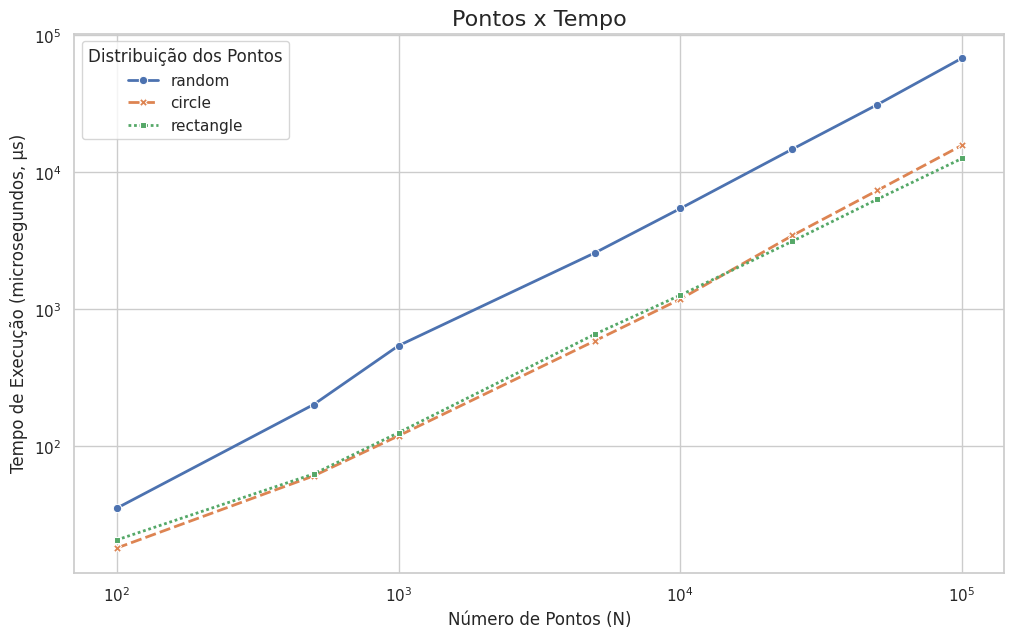

In [18]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df,
    x='n_pontos',
    y='tempo_us',
    hue='distribuicao',  # Cria linhas de cores diferentes para cada distribuição
    style='distribuicao', # Estilos de linha diferentes
    markers=True,         # Adiciona marcadores nos pontos de dados
    lw=2                  # Largura da linha
)

plt.title('Pontos x Tempo', fontsize=16)
plt.xlabel('Número de Pontos (N)', fontsize=12)
plt.ylabel('Tempo de Execução (microsegundos, µs)', fontsize=12)
plt.legend(title='Distribuição dos Pontos')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Tamanho da Envoltória vs. Total de Pontos (N)

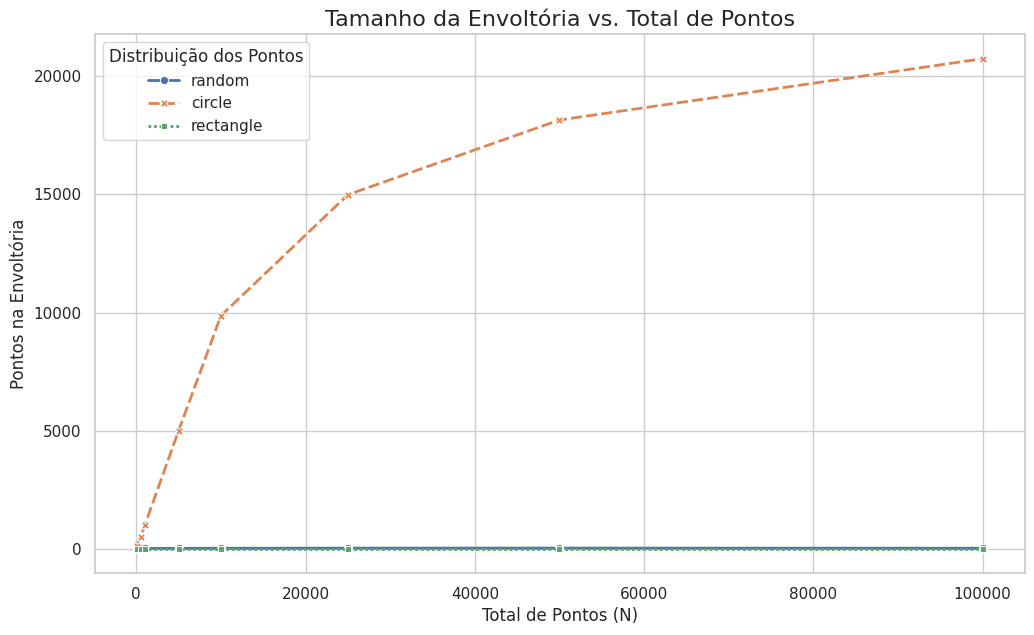

In [15]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df,
    x='n_pontos',
    y='n_envoltoria',
    hue='distribuicao',
    style='distribuicao',
    markers=True,
    lw=2
)

plt.title('Tamanho da Envoltória vs. Total de Pontos', fontsize=16)
plt.xlabel('Total de Pontos (N)', fontsize=12)
plt.ylabel('Pontos na Envoltória', fontsize=12)
plt.legend(title='Distribuição dos Pontos')
plt.show()

# Tempo por Ponto

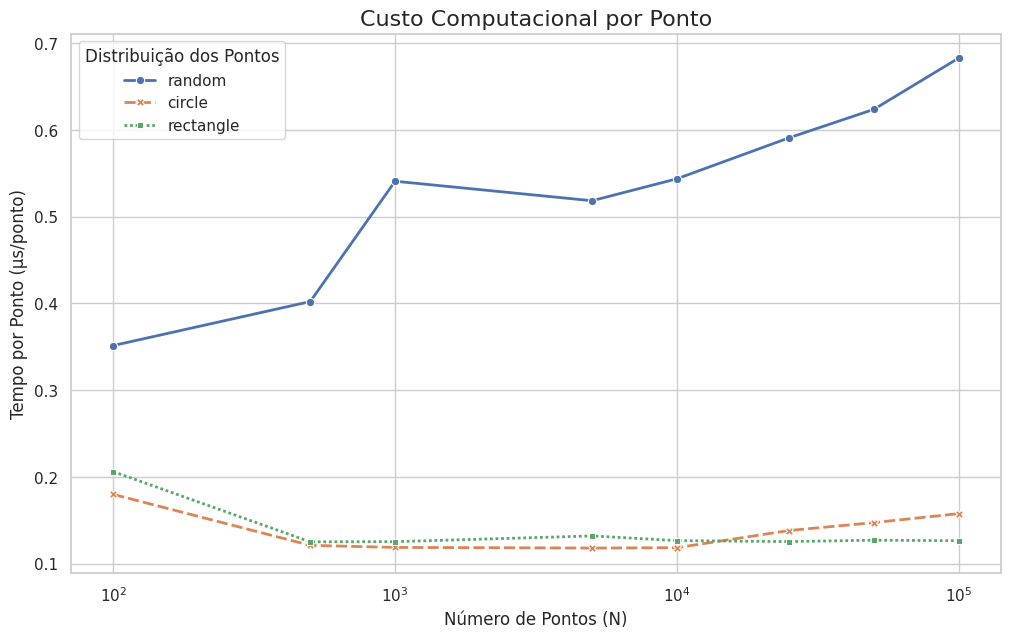

In [16]:
# Cria uma nova coluna 'tempo_por_ponto'
df['tempo_por_ponto_us'] = df['tempo_us'] / df['n_pontos']

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=df,
    x='n_pontos',
    y='tempo_por_ponto_us',
    hue='distribuicao',
    style='distribuicao',
    markers=True,
    lw=2
)

plt.title('Custo Computacional por Ponto', fontsize=16)
plt.xlabel('Número de Pontos (N)', fontsize=12)
plt.ylabel('Tempo por Ponto (µs/ponto)', fontsize=12)
plt.legend(title='Distribuição dos Pontos')

# A escala log em X é a melhor para ver a tendência do log(N)
plt.xscale('log')
plt.show()